In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [4]:
#eu deveria vasculhar todas as pastas e comparar os resultados do do hcac e hcac-ml com bow e embeddings
#tem uma pasta para cada dataset que segue a organização dataset/tipo_de_embedding/metodo/ ou dataset/bow
#os graficos devem apresentar os resultados dos algoritmos hcac e hcac-ml para cada tipo de embedding e bow
#os graficos podem ser organizados de acordo com o tipo de embedding


In [9]:
#valores para percorrer os resultados
datasets = ["eleicao", "dilma"]
methods = ["std", "no_stopwords"]
embeddings =["skip_s50", "skip_s100"]

In [6]:
for dataset in datasets:
    for emb in embeddings:
        for method in methods:
            

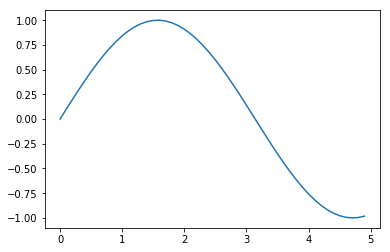

In [7]:
plt.plot(x,y)